# Early Heart Disease Prediction Detection Using Machine Learning Algorithms


## Data Pre-Processing and_Feature_Encoding

In [3]:
# importing all the necessary libraries and classes
import pandas as edhd_pd
import numpy as edhd_np
import matplotlib.pyplot as edhd_plot
import seaborn as edhd_sns
import plotly.express as edhd_px
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [4]:
# loading ckd cleaned dataset

edhd_DataFrame= edhd_pd.read_csv('EDHD_cleaned.csv')
edhd_DataFrame

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,Resting Electrocardiographic Results,Maximum Heart Rate Achieved,Exercise-Induced Angina,ST Depression,Slope of the Peak Exercise,Number of Vessels,Thalassemia,Heart Disease
0,63,male,asymptomatic,145,233,No,normal,150,0,2.3,0,0,1,1
1,37,male,non-anginal pain,130,250,Yes,abnormality,187,0,3.5,0,0,2,1
2,41,female,atypical angina,130,204,Yes,normal,172,0,1.4,2,0,2,1
3,56,male,atypical angina,120,236,Yes,abnormality,178,0,0.8,2,0,2,1
4,57,female,typical angina,120,354,Yes,abnormality,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,typical angina,140,241,Yes,abnormality,123,1,0.2,1,0,3,0
299,45,male,asymptomatic,110,264,Yes,abnormality,132,0,1.2,1,0,3,0
300,68,male,typical angina,144,193,No,abnormality,141,0,3.4,1,2,3,0
301,57,male,typical angina,130,131,Yes,abnormality,115,1,1.2,1,1,3,0


In [5]:
#checking for null values in the dataset
edhd_DataFrame.isnull().sum().sort_values()

Age                                     0
Sex                                     0
Chest Pain Type                         0
Resting Blood Pressure                  0
Cholesterol                             0
Fasting Blood Sugar                     0
Resting Electrocardiographic Results    0
Maximum Heart Rate Achieved             0
Exercise-Induced Angina                 0
ST Depression                           0
Slope of the Peak Exercise              0
Number of Vessels                       0
Thalassemia                             0
Heart Disease                           0
dtype: int64

In [6]:
# Extracting categorical and numerical columns
categorical_columns = [featuredColumn for featuredColumn in edhd_DataFrame.columns if edhd_DataFrame[featuredColumn].dtype == 'object']
numerical_columns = [featuredColumn for featuredColumn in edhd_DataFrame.columns if edhd_DataFrame[featuredColumn].dtype != 'object']

edhd_DataFrame[categorical_columns].isnull().sum().sort_values()

Sex                                     0
Chest Pain Type                         0
Fasting Blood Sugar                     0
Resting Electrocardiographic Results    0
dtype: int64

In [7]:
edhd_DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0    Age                                   303 non-null    int64  
 1    Sex                                   303 non-null    object 
 2    Chest Pain Type                       303 non-null    object 
 3    Resting Blood Pressure                303 non-null    int64  
 4    Cholesterol                           303 non-null    int64  
 5    Fasting Blood Sugar                   303 non-null    object 
 6    Resting Electrocardiographic Results  303 non-null    object 
 7    Maximum Heart Rate Achieved           303 non-null    int64  
 8    Exercise-Induced Angina               303 non-null    int64  
 9    ST Depression                         303 non-null    float64
 10   Slope of the Peak Exercise            303 non-null    int64  
 11   Numbe

In [8]:
edhd_DataFrame.isnull().sum().sort_values()

Age                                     0
Sex                                     0
Chest Pain Type                         0
Resting Blood Pressure                  0
Cholesterol                             0
Fasting Blood Sugar                     0
Resting Electrocardiographic Results    0
Maximum Heart Rate Achieved             0
Exercise-Induced Angina                 0
ST Depression                           0
Slope of the Peak Exercise              0
Number of Vessels                       0
Thalassemia                             0
Heart Disease                           0
dtype: int64

In [9]:
edhd_DataFrame.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

In [10]:
duplicates = edhd_DataFrame[edhd_DataFrame.duplicated(keep=False)]  # Keep=False to mark all duplicates
print("Duplicate rows:\n", duplicates)

Duplicate rows:
      Age   Sex   Chest Pain Type  Resting Blood Pressure  Cholesterol  \
163   38  male  non-anginal pain                     138          175   
164   38  male  non-anginal pain                     138          175   

    Fasting Blood Sugar Resting Electrocardiographic Results  \
163                 Yes                          abnormality   
164                 Yes                          abnormality   

     Maximum Heart Rate Achieved  Exercise-Induced Angina  ST Depression  \
163                          173                        0            0.0   
164                          173                        0            0.0   

     Slope of the Peak Exercise  Number of Vessels  Thalassemia  Heart Disease  
163                           2                  4            2              1  
164                           2                  4            2              1  


In [11]:
df_cleaned = edhd_DataFrame.drop_duplicates()
df_cleaned 

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,Resting Electrocardiographic Results,Maximum Heart Rate Achieved,Exercise-Induced Angina,ST Depression,Slope of the Peak Exercise,Number of Vessels,Thalassemia,Heart Disease
0,63,male,asymptomatic,145,233,No,normal,150,0,2.3,0,0,1,1
1,37,male,non-anginal pain,130,250,Yes,abnormality,187,0,3.5,0,0,2,1
2,41,female,atypical angina,130,204,Yes,normal,172,0,1.4,2,0,2,1
3,56,male,atypical angina,120,236,Yes,abnormality,178,0,0.8,2,0,2,1
4,57,female,typical angina,120,354,Yes,abnormality,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,typical angina,140,241,Yes,abnormality,123,1,0.2,1,0,3,0
299,45,male,asymptomatic,110,264,Yes,abnormality,132,0,1.2,1,0,3,0
300,68,male,typical angina,144,193,No,abnormality,141,0,3.4,1,2,3,0
301,57,male,typical angina,130,131,Yes,abnormality,115,1,1.2,1,1,3,0


In [12]:
# Calculate the counts
original_count = len(edhd_DataFrame)
cleaned_count = len(edhd_DataFrame)
duplicate_count = original_count - cleaned_count



In [13]:
# Display counts
print(f"Original Row Count: {original_count}")
print(f"Cleaned Row Count: {cleaned_count}")
print(f"Number of Duplicates: {duplicate_count}")


Original Row Count: 303
Cleaned Row Count: 303
Number of Duplicates: 0


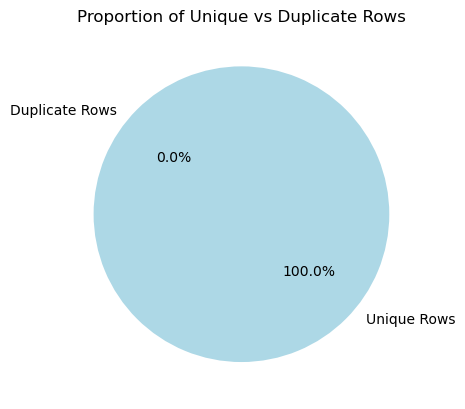

In [14]:
# Pie chart data
sizes = [cleaned_count, duplicate_count]
labels = ['Unique Rows', 'Duplicate Rows']
colors = ['lightblue', 'lightcoral']

# Plot pie chart
fig, ax = edhd_plot.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
ax.set_title('Proportion of Unique vs Duplicate Rows')

# Show the plot
edhd_plot.show()

In [15]:
from scipy import stats

# Calculate Z-scores for numerical columns
z_scores = stats.zscore(edhd_DataFrame[numerical_columns])
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)  # Adjust the threshold as needed
edhd_DataFrame_cleaned = edhd_DataFrame[filtered_entries]
edhd_DataFrame_cleaned

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,Resting Electrocardiographic Results,Maximum Heart Rate Achieved,Exercise-Induced Angina,ST Depression,Slope of the Peak Exercise,Number of Vessels,Thalassemia,Heart Disease
0,63,male,asymptomatic,145,233,No,normal,150,0,2.3,0,0,1,1
1,37,male,non-anginal pain,130,250,Yes,abnormality,187,0,3.5,0,0,2,1
2,41,female,atypical angina,130,204,Yes,normal,172,0,1.4,2,0,2,1
3,56,male,atypical angina,120,236,Yes,abnormality,178,0,0.8,2,0,2,1
4,57,female,typical angina,120,354,Yes,abnormality,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,typical angina,140,241,Yes,abnormality,123,1,0.2,1,0,3,0
299,45,male,asymptomatic,110,264,Yes,abnormality,132,0,1.2,1,0,3,0
300,68,male,typical angina,144,193,No,abnormality,141,0,3.4,1,2,3,0
301,57,male,typical angina,130,131,Yes,abnormality,115,1,1.2,1,1,3,0


In [30]:
# Calculate IQR for numerical columns
Q1 = edhd_DataFrame[numerical_columns].quantile(0)
Q3 = edhd_DataFrame[numerical_columns].quantile(1)
IQR = Q3 - Q1
filtered_entries = ((edhd_DataFrame[numerical_columns] >= (Q1 - 1.5 * IQR)) & (edhd_DataFrame[numerical_columns] <= (Q3 + 1.5 * IQR))).all(axis=1)
edhd_DataFrame_cleaned1 = edhd_DataFrame[filtered_entries]
edhd_DataFrame_cleaned1

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,Resting Electrocardiographic Results,Maximum Heart Rate Achieved,Exercise-Induced Angina,ST Depression,Slope of the Peak Exercise,Number of Vessels,Thalassemia,Heart Disease
0,63,male,asymptomatic,145,233,No,normal,150,0,2.3,0,0,1,1
1,37,male,non-anginal pain,130,250,Yes,abnormality,187,0,3.5,0,0,2,1
2,41,female,atypical angina,130,204,Yes,normal,172,0,1.4,2,0,2,1
3,56,male,atypical angina,120,236,Yes,abnormality,178,0,0.8,2,0,2,1
4,57,female,typical angina,120,354,Yes,abnormality,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,typical angina,140,241,Yes,abnormality,123,1,0.2,1,0,3,0
299,45,male,asymptomatic,110,264,Yes,abnormality,132,0,1.2,1,0,3,0
300,68,male,typical angina,144,193,No,abnormality,141,0,3.4,1,2,3,0
301,57,male,typical angina,130,131,Yes,abnormality,115,1,1.2,1,1,3,0


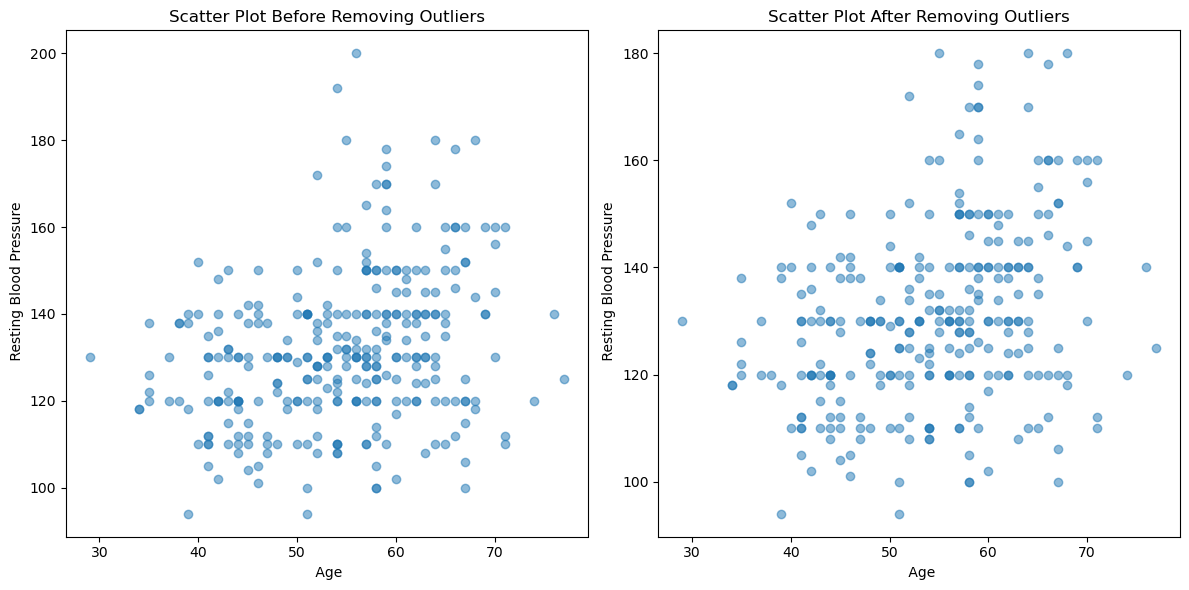

In [17]:
# Scatter plot to visualize the effect of outlier removal
# Assuming you have at least two numerical columns for scatter plot
if len(numerical_columns) >= 2:
    edhd_plot.figure(figsize=(12, 6))
    edhd_plot.subplot(1, 2, 1)
    edhd_plot.scatter(edhd_DataFrame[numerical_columns[0]], edhd_DataFrame[numerical_columns[1]], alpha=0.5)
    edhd_plot.title('Scatter Plot Before Removing Outliers')
    edhd_plot.xlabel(numerical_columns[0])
    edhd_plot.ylabel(numerical_columns[1])

    edhd_plot.subplot(1, 2, 2)
    edhd_plot.scatter(edhd_DataFrame_cleaned[numerical_columns[0]], edhd_DataFrame_cleaned[numerical_columns[1]], alpha=0.5)
    edhd_plot.title('Scatter Plot After Removing Outliers')
    edhd_plot.xlabel(numerical_columns[0])
    edhd_plot.ylabel(numerical_columns[1])

    edhd_plot.tight_layout()
    edhd_plot.show()
else:
    print("Not enough numerical columns for scatter plot.")


## Feature Encoding

In [19]:
for featuredColumn in categorical_columns:
      print(f"[{featuredColumn}] column have {edhd_DataFrame_cleaned1[featuredColumn].nunique()} categories : {edhd_DataFrame_cleaned1[featuredColumn].unique()} \n")

[ Sex] column have 2 categories : ['female' 'male'] 

[ Chest Pain Type] column have 3 categories : ['atypical angina' 'non-anginal pain' 'typical angina'] 

[ Fasting Blood Sugar] column have 1 categories : ['Yes'] 

[ Resting Electrocardiographic Results] column have 2 categories : ['normal' 'abnormality'] 



In [32]:
#as all of the categorical columns have 2 categories we can use label encoder
from sklearn.preprocessing import LabelEncoder

edhd_LabelEncoder = LabelEncoder()
for featuredColumn in categorical_columns:
    # Fit and transform the categorical data
    edhd_DataFrame[featuredColumn] = edhd_LabelEncoder.fit_transform(edhd_DataFrame[featuredColumn])

edhd_DataFrame

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,Resting Electrocardiographic Results,Maximum Heart Rate Achieved,Exercise-Induced Angina,ST Depression,Slope of the Peak Exercise,Number of Vessels,Thalassemia,Heart Disease
0,63,1,0,145,233,0,2,150,0,2.3,0,0,1,1
1,37,1,2,130,250,1,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,1,2,172,0,1.4,2,0,2,1
3,56,1,1,120,236,1,1,178,0,0.8,2,0,2,1
4,57,0,3,120,354,1,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,3,140,241,1,1,123,1,0.2,1,0,3,0
299,45,1,0,110,264,1,1,132,0,1.2,1,0,3,0
300,68,1,3,144,193,0,1,141,0,3.4,1,2,3,0
301,57,1,3,130,131,1,1,115,1,1.2,1,1,3,0


In [34]:
edhd_DataFrame.to_csv('EDHD_Preprocessed.csv', index=False)